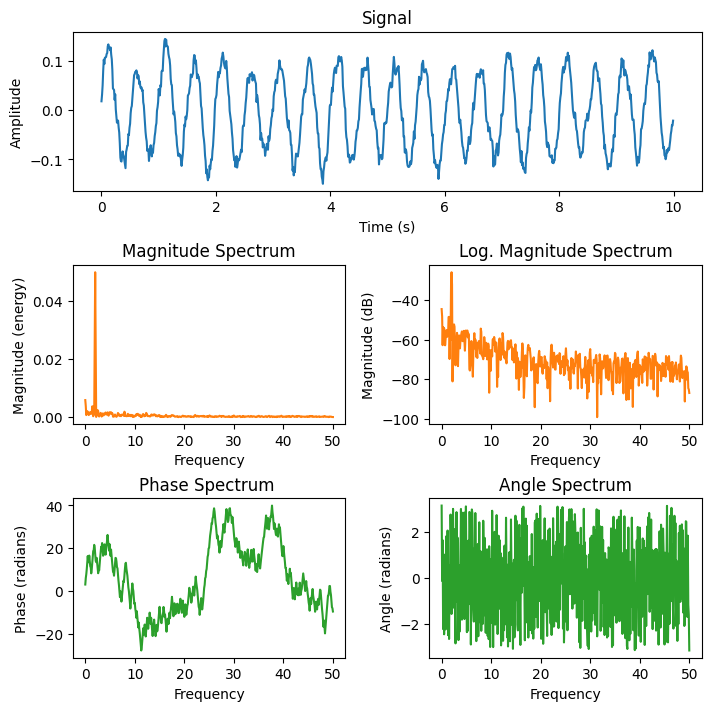

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"],
                          ["magnitude", "log_magnitude"],
                          ["phase", "angle"]])

# plot time signal:
axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color='C0')
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

# plot different spectrum types:
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=Fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs["phase"].set_title("Phase Spectrum ")
axs["phase"].phase_spectrum(s, Fs=Fs, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(s, Fs=Fs, color='C2')

plt.show()